In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import requests
%matplotlib inline

In [4]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [28]:
cdf = df[["ENGINESIZE",'CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


In [49]:
msk = np.random.rand(len(cdf)) < 0.8
test = cdf[~msk]
train = cdf[msk]

In [54]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = train["ENGINESIZE"]
train_y = train["CO2EMISSIONS"]
test_x = np.asanyarray(test["ENGINESIZE"])
test_y = np.asanyarray(test["CO2EMISSIONS"])
poly = PolynomialFeatures(degree=3)
poly_train_x = poly.fit_transform(train_x)

ValueError: Expected 2D array, got 1D array instead:
array=[2.  2.4 1.5 3.5 3.5 3.7 3.7 2.4 2.4 3.5 5.9 5.9 4.7 4.7 4.7 5.9 2.  2.
 2.  2.  2.  2.  3.  3.  3.  3.  4.  3.  3.  4.  6.3 3.  2.  2.  3.  2.
 3.  3.  4.2 5.2 5.2 4.2 4.2 5.2 5.2 4.2 4.  3.  3.  3.  3.  4.  4.  4.
 3.  2.  2.  2.  2.  4.  6.  4.  6.  6.  6.8 2.  2.  2.  2.  2.  2.  2.
 2.  2.  2.  3.  3.  3.  3.  3.  2.  2.  3.  3.  3.  3.  2.  3.  3.  3.
 4.4 4.4 4.4 4.4 4.4 3.  4.4 3.  3.  4.4 4.4 4.4 4.4 4.4 4.4 4.4 2.  3.
 2.  3.  3.  4.4 4.4 2.  2.  3.  3.  3.  3.6 3.6 1.4 3.6 3.6 3.6 3.6 2.
 2.  2.4 2.  2.  2.4 2.  2.  2.5 3.6 3.6 3.6 3.6 3.6 2.  3.6 3.6 3.6 6.2
 6.2 6.2 6.2 6.2 6.2 6.2 6.2 6.2 3.6 3.6 3.6 3.6 3.6 3.6 3.6 3.6 6.2 6.2
 6.2 6.2 6.2 1.4 1.4 1.8 1.8 2.  1.4 1.4 3.6 3.6 2.4 3.6 3.6 4.3 5.3 5.3
 5.3 5.3 5.3 5.3 5.3 5.3 5.3 4.8 6.  6.  4.8 2.5 3.6 3.6 2.4 2.  2.5 2.4
 2.4 4.3 4.3 5.3 6.2 4.3 4.3 5.3 5.3 6.2 1.4 1.4 1.8 1.4 1.4 1.8 1.8 1.4
 1.4 1.4 1.2 1.2 5.3 5.3 5.3 5.3 5.3 5.3 3.6 1.4 1.4 2.4 3.6 3.6 3.6 3.6
 3.6 5.7 3.6 3.6 3.6 2.4 3.6 3.6 5.7 6.4 6.4 3.6 3.6 5.7 3.6 5.7 3.6 3.6
 3.6 3.6 2.  2.4 2.4 2.  2.  2.4 2.4 1.4 1.4 5.7 3.6 3.6 3.6 3.6 3.6 1.4
 1.4 1.4 1.4 1.4 1.4 1.4 1.4 2.  4.6 4.6 5.4 4.6 4.6 6.8 5.4 5.4 2.  3.5
 1.6 2.5 2.  5.4 2.  3.5 3.5 3.5 3.5 3.5 3.5 6.2 3.7 5.  5.  5.  5.  3.7
 3.7 3.7 5.  6.2 1.6 1.6 1.  1.6 3.5 3.5 3.5 2.  2.  2.  2.  2.  2.  2.
 2.  1.5 1.6 2.  2.5 2.  3.7 5.  5.  5.8 3.7 3.5 3.5 3.5 3.5 1.6 1.6 3.6
 3.6 5.3 5.3 5.3 5.3 5.3 5.3 5.3 5.3 5.3 4.8 6.  6.  4.8 6.  6.  4.3 4.3
 5.3 6.2 4.3 4.3 5.3 5.3 6.2 2.4 3.6 2.4 3.6 3.6 5.3 5.3 5.3 6.2 6.2 6.2
 5.3 5.3 5.3 2.4 2.4 2.4 3.5 3.5 3.5 2.  1.8 1.8 3.5 2.4 1.5 1.5 3.5 3.5
 3.5 3.5 1.6 1.6 2.  5.  3.8 3.3 3.3 2.  2.4 2.  2.4 2.4 2.4 2.  2.4 2.
 2.4 1.6 1.6 1.6 1.6 3.7 3.7 3.5 3.5 3.7 3.7 3.7 3.7 5.6 5.6 3.5 3.5 2.5
 5.  5.6 3.  3.  5.  2.  3.  5.  5.  5.  5.  3.  5.  5.  5.  5.  5.  5.
 5.  5.  5.  2.4 3.2 2.4 3.2 2.4 3.2 2.4 3.2 2.4 2.4 2.4 2.4 5.7 3.  3.6
 6.4 2.  2.  2.4 2.4 2.4 2.4 3.6 3.6 3.6 3.6 3.3 1.8 1.8 2.  1.6 1.6 2.
 1.6 2.  2.  2.  2.4 1.6 1.6 2.  2.  3.3 2.4 1.6 1.6 2.  2.  2.4 2.4 6.5
 5.2 5.2 2.  3.  2.  2.  5.  5.  5.  3.  3.  3.  5.  5.  3.  3.  3.  5.
 5.  1.8 2.5 3.5 3.5 3.5 4.6 2.5 2.5 2.5 3.5 3.5 5.  4.6 4.6 4.6 5.  5.7
 3.5 3.5 3.5 3.5 3.5 2.  3.7 3.7 2.  3.7 5.4 5.4 3.  3.  4.7 4.7 3.  2.
 2.5 2.  2.5 3.7 1.5 1.5 2.5 2.5 2.  2.  2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.
 2.  2.  1.8 3.5 3.5 3.5 3.5 3.5 6.2 6.2 4.7 5.5 2.  4.7 3.5 3.5 3.5 3.5
 3.5 3.5 3.5 4.7 4.7 4.7 5.5 5.5 5.5 5.5 5.5 3.  4.7 4.7 3.5 3.5 3.  4.7
 5.5 4.7 4.7 5.5 5.5 6.  1.8 1.8 3.5 5.5 6.2 6.2 1.6 1.6 1.6 1.6 1.6 1.6
 1.6 1.6 1.6 1.6 1.6 1.6 1.6 1.6 1.6 1.6 1.6 1.6 1.6 1.6 1.6 1.6 1.6 1.6
 1.6 1.6 1.6 1.6 1.6 1.6 1.6 1.6 1.6 2.  2.  2.  2.  2.  2.  1.2 1.2 2.4
 2.4 3.  2.  2.  2.  3.7 3.7 3.7 2.5 3.5 5.6 2.5 2.5 4.  4.  4.  3.8 1.6
 1.6 1.6 3.5 3.5 2.  3.5 3.5 2.5 3.5 2.5 1.8 5.6 1.6 4.  4.  3.4 3.4 3.4
 3.4 3.8 3.8 3.4 3.4 3.8 3.8 3.8 3.8 3.8 3.8 3.8 3.8 2.7 2.7 3.4 3.6 3.
 4.8 4.8 3.  4.8 2.7 2.7 3.4 3.4 3.6 3.  3.  4.8 4.8 4.8 5.7 5.7 5.7 3.
 3.6 3.6 3.  3.6 3.6 3.6 3.6 6.6 6.6 6.7 6.7 6.7 6.7 6.6 2.  2.  1.3 2.5
 2.5 2.4 1.8 1.8 1.  1.  8.4 8.4 2.  2.5 2.5 2.  2.  2.5 2.  2.  2.5 2.5
 3.6 2.5 2.5 3.6 3.6 2.  2.  2.  4.  4.  3.5 2.5 3.5 2.5 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 3.5 3.5 3.5 3.5 1.8 2.5 2.5 5.7 3.5 3.5 2.7 2.7 4.  2.7 4.
 4.  4.  4.6 4.6 3.5 2.7 3.5 1.5 1.8 1.8 2.  2.5 1.8 2.  2.  2.5 2.  2.
 2.  2.  3.6 2.  2.5 2.5 2.  2.  1.8 1.8 2.  2.  2.  2.  1.4 1.8 1.8 2.5
 3.6 3.6 2.  2.  3.6 3.  2.5 2.5 3.2 3.  3.2 3.  3.2 3.2 3.2].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [55]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(poly_train_x,train_y)
print(clf.coef_)
print(clf.intercept_)

ValueError: Found input variables with inconsistent numbers of samples: [854, 861]

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

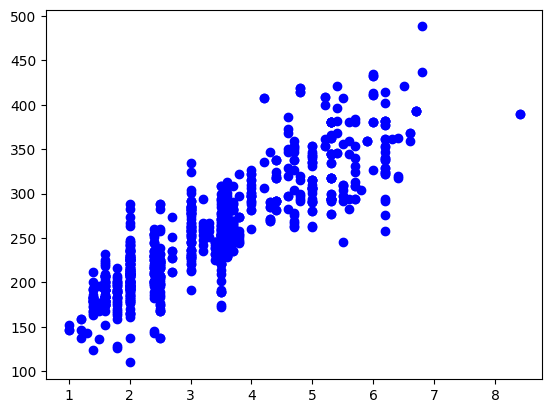

In [53]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0,10.0,0.1)
yy = clf.intercept_+clf.coef_[0]*XX + clf.coef_[1]*np.power(XX,2) + clf.coef_[2]*np.power(XX,3)
plt.plot(XX,yy,'-r')
plt.show()